In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

### 데이터 불러오기

In [182]:
train_df = pd.read_csv('train.csv')
age_gender_df = pd.read_csv('age_gender_info.csv')
test_df = pd.read_csv('test.csv')

In [183]:
train_df.shape, age_gender_df.shape, test_df.shape

((2952, 15), (16, 23), (1022, 14))

### 데이터 결측치 column 확인

In [184]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

- train 데이터 결측치 : 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리내 버스정류장 수

In [185]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

- test 데이터 결측치 : 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영)

### 데이터 중복 확인

In [186]:
train_df.shape, train_df.drop_duplicates().shape
# 중복이 존재함

((2952, 15), (2632, 15))

In [187]:
test_df.shape, test_df.drop_duplicates().shape
# 중복이 존재함

((1022, 14), (949, 14))

**중복데이터는 제거하고 분석을 진행**

In [188]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

### 데이터 타입 변환
- 임대보증금, 임대료 컬럼은 object -> 실수형으로 변경필요.

In [189]:

# train_df['임대보증금'] = train_df['임대보증금'].astype(float)

# ValueError: could not convert string to float: '-'
# 데이터 중에 숫자, NaN 말고 "-" 기호가 들어 있음. 형변환을 위해 변경 필요.

import re # 정규표현식
arr = []
arr2 = []
for i,j in train_df[['임대보증금','임대료']].values:
    arr.append(re.sub(r"[0-9]","",str(i)))
    arr2.append(re.sub(r"[0-9]","",str(j)))
print(set(arr))
print(set(arr2))

{'', '-', 'nan'}
{'', '-', 'nan'}


In [190]:
train_df.loc[train_df['임대보증금'] == '-','임대보증금'] = np.nan
train_df.loc[train_df['임대료'] == '-','임대료'] = np.nan

train_df['임대보증금'] = train_df['임대보증금'].astype(float)
train_df['임대료'] = train_df['임대료'].astype(float)

### 결측치
- train : 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리내 버스정류장 수
- test : 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영)

- 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리내 버스정류장 수
    - 숫자형 데이터
    - 분석을 위해 0으로 전부 설정하고 모델링 
    - 모델 평가시, 더 점수가 높게 나오는 것을 찾아가며 수정 예정

- 자격유형
    - 범주형 데이터
    - 결측치가 2개 뿐이므로, 확인 후 채우고 시작

In [193]:
cols = ['임대보증금', '임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수']

train_df[cols] = train_df[cols].fillna(0)
test_df[cols] = test_df[cols].fillna(0)

In [201]:
train_df.isnull().sum().sum() # train data 에는 결측치 X

0

In [202]:
test_df.isnull().sum().sum() # test 데이터 셋에만 있는 자격유형 결측치 2개 남음.

2

In [203]:
test_df[test_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [204]:
test_df[test_df['단지코드'] == 'C2411'] # 같은 단지 확인

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [205]:
test_df[ (test_df['단지코드']=='C2411') & (test_df['자격유형'].isnull())] = 'A'

In [206]:
test_df[test_df['단지코드'] == 'C2253'] # 같은 단지 확인

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,0,0,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,0,0,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,0,0,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,0,0,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,0,0,0.0,2.0,173.0
268,C2253,1161,상가,강원도,임대상가,24.19,1,0.0,D,0,0,0.0,2.0,173.0
269,C2253,1161,상가,강원도,임대상가,27.75,1,0.0,D,0,0,0.0,2.0,173.0


In [207]:
test_df[ (test_df['단지코드']=='C2253') & (test_df['자격유형'].isnull())] = 'C' # 같은 아파트 유형이 C이므로 C로 결측치 채움.

In [214]:
test_df['단지코드'].isnull().sum() # 결측치 모두 채움.

0

### 피처 탐색
- 도메인 정의서 내용 채울 수 있도록 간단히 정의 내림

(1) 단지코드 - 아파트의 단지의 코드를 표기하는 문자열

In [217]:
train_df['단지코드'].describe() # 총 423 단지

count      2632
unique      423
top       C2132
freq         31
Name: 단지코드, dtype: object

In [235]:
train_df['단지코드'].value_counts()

C2132    31
C2051    23
C1790    19
C1439    19
C2507    18
         ..
C1672     2
C2340     1
C2188     1
C2437     1
C2520     1
Name: 단지코드, Length: 423, dtype: int64

<AxesSubplot:>

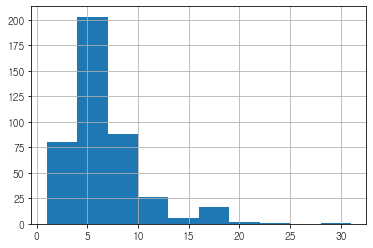

In [238]:
train_df['단지코드'].value_counts().hist() # 대부분 아파트 단지가 1~10 개 사이임.
# 단지수가 크면 등록주차대수도 올라갈 것으로 예상되고, 일단은 제거할 필요 없어 보임.

(2) 총 세대수 : 아파트 단지에 살고 있는 세대의 총 인원수

In [282]:
train_df['총세대수'].describe() # 총세대수의 경우 26~2568 까지 다양하게 존재함. 표준편차가 높은건가? 글로 봐서는 모르겠네.

count    2632.000000
mean      854.095365
std       484.047918
min        26.000000
25%       504.000000
50%       773.000000
75%      1065.000000
max      2568.000000
Name: 총세대수, dtype: float64

In [285]:
train_df[['단지코드','총세대수']] # 단지코드별 총세대수가 동일 -> 각 단지의 총 세대수를 말하는 것임!

,단지코드,총세대수
0,C2483,900
1,C2483,900
2,C2483,900
3,C2483,900
4,C2483,900
...,...,...
2947,C2532,239
2948,C2532,239
2949,C2532,239
2950,C2532,239


<BarContainer object of 423 artists>

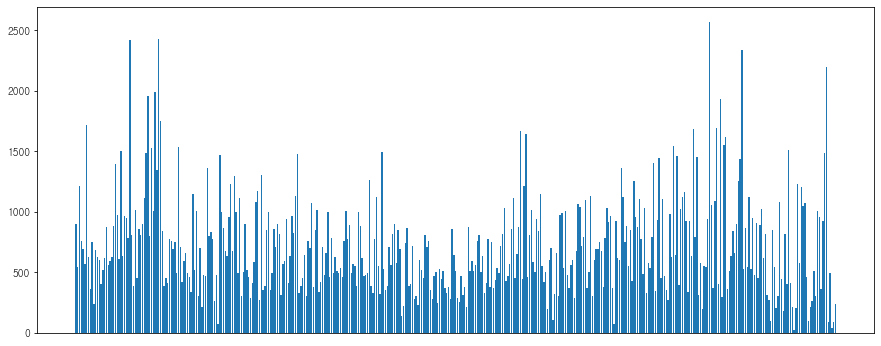

In [296]:
drop_t = train_df[['단지코드','총세대수']].drop_duplicates() # 중복되는거 빼고 확인
plt.figure(figsize=(15,6))
plt.xticks([])
plt.bar(drop_t['단지코드'],drop_t['총세대수'])  # 단지별로 총 세대수 적고 많음이 다양함.

(3) 임대건물구분 : 건물을 용도에 따라 상가/아파트로 구분
- 아파트와 상가는 목적이 다른 건물이므로, 분석시 따로 나눠서 분석해볼 필요 있음.

In [250]:
train_df['임대건물구분'].describe()

count     2632
unique       2
top        아파트
freq      2347
Name: 임대건물구분, dtype: object

In [270]:
train_df['임대건물구분'].value_counts() 

아파트    2347
상가      285
Name: 임대건물구분, dtype: int64

<BarContainer object of 2 artists>

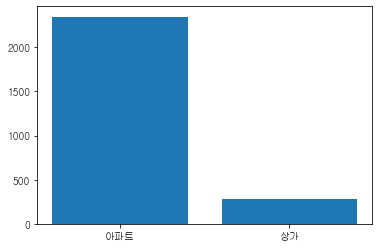

In [271]:
plt.bar(['아파트','상가'], train_df['임대건물구분'].value_counts()) #  아파트가 상가보다 훨씬 많은 데이터를 차지 하고 있음.

(4) 지역 : 단지가 분류된 위치로 16개로 구분됨.

In [256]:
train_df['지역'].describe() # 16개 지역

count     2632
unique      16
top        경기도
freq       609
Name: 지역, dtype: object

In [299]:
train_df['지역'].unique() # 인천이 없네!

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [316]:
# 단순히 지역단지 갯수가 아니고, 지역별 총세대수에 따라서 시각화
re_cnt = train_df.groupby(['지역']).sum()['총세대수'].sort_values(ascending=False) # 지역별로 몇명있나!

<BarContainer object of 16 artists>

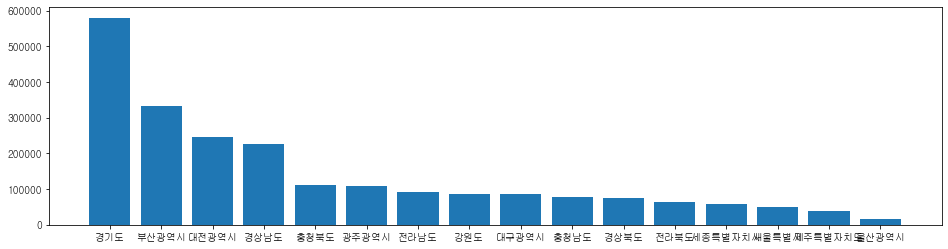

In [319]:
plt.figure(figsize=(16,4))
plt.bar(re_cnt.index, re_cnt.values)

# 세종은 총세대수가 낮은편임. 그럼에도 등록주차대수가 매우 많은것을 뒤에서 확인 가능
# 총세대수가 높다고 무조건 등록주차대수가 많은 것은 아니며,
# 다른 요인이 크게 작용할 것으로 예상됨.

(5) 공급유형 : 임대기간, 규모, 소득 등에 따라 구분해놓은 주택 유형

In [322]:
train_df['공급유형'].describe() # 총 10개의 유형이 있으며, 국민임대가 가장 빈도수 높게 나타남.

count     2632
unique      10
top       국민임대
freq      1730
Name: 공급유형, dtype: object

In [324]:
train_df['공급유형'].unique() # 같은 공공임대끼리는 묶어도 될것같은데? 


array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
       '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object)

<AxesSubplot:>

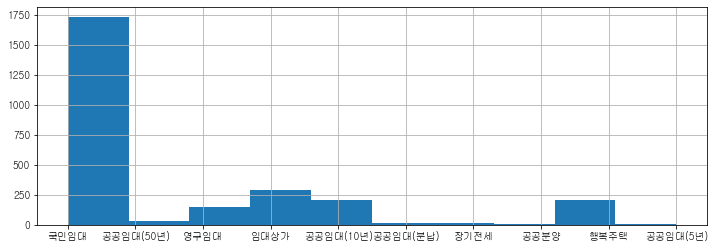

In [330]:
plt.figure(figsize=(12,4))
train_df['공급유형'].hist() # 편차가 심함. 
# 특징 찾아서 유형갯수 줄이는 작업도 해볼 필요 있을 듯! (물론 성능이 더 떨어지면 다시 원복)

In [335]:
t_mean = train_df.groupby(['공급유형']).mean()['임대보증금'].sort_values(ascending=False) 
# 소득정보가 없으므로 공급유형별 보증금을 통해 각 유형을 예측 해보자
t_mean

공급유형
장기전세         1.842430e+08
공공임대(분납)     1.169595e+08
공공임대(10년)    5.099743e+07
행복주택         3.433645e+07
공공임대(5년)     2.700000e+07
국민임대         2.328041e+07
공공임대(50년)    1.395458e+07
영구임대         8.583733e+06
공공분양         0.000000e+00
임대상가         0.000000e+00
Name: 임대보증금, dtype: float64

<BarContainer object of 10 artists>

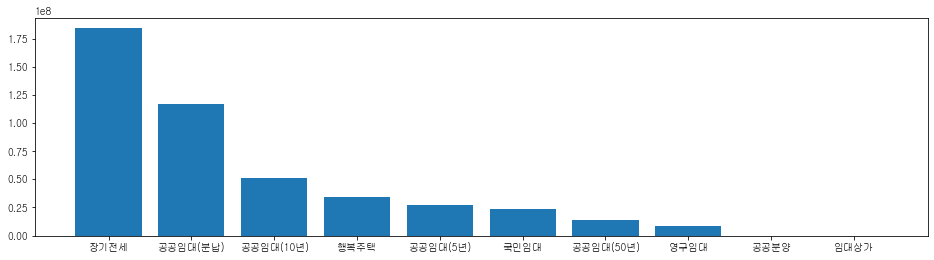

In [336]:
plt.figure(figsize=(16,4))
plt.bar(t_mean.index, t_mean.values) # 보증금은 장기전세가 매우 높은편. 
# 장기전세의 등록차량대수가 많을 가능성이 높음. 소득이 높다면 차를 보유활 확률 높아지기 때문.
# 실제로 등록차량대수를 살펴보면 3위로 차량대수가 많음.

# 공공분양과 임대상가는 보증금 평균이 0
# 모든 데이터가 NaN 고, 결측치 채울때 0으로 설정됨


### 피처간의 상관관계 분석
- 회귀의 경우 다중공선성 문제가 생길수 있으므로, 체크할 필요 있음.
- 모델링 결과 보면서 다시 돌아와서 확인할 부분.

In [245]:
train_df.corr() 

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
총세대수,1.000000,0.067498,0.168208,0.103241,-0.069686,-0.073734,0.131384,0.038483,0.598347,0.316479
전용면적,0.067498,1.000000,-0.071887,-0.116087,0.124295,0.192440,-0.000607,-0.007341,0.035756,0.069457
전용면적별세대수,0.168208,-0.071887,1.000000,0.151090,0.018584,0.076397,-0.024246,0.054413,0.231223,0.196238
공가수,0.103241,-0.116087,0.151090,1.000000,0.109310,-0.062348,-0.110199,0.050872,0.292526,0.174663
임대보증금,-0.069686,0.124295,0.018584,0.109310,1.000000,0.543188,-0.023645,0.101417,0.335281,0.394968
임대료,-0.073734,0.192440,0.076397,-0.062348,0.543188,1.000000,0.005629,0.042913,0.339759,0.486978
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.131384,-0.000607,-0.024246,-0.110199,-0.023645,0.005629,1.000000,0.106098,-0.028426,-0.074346
도보 10분거리 내 버스정류장 수,0.038483,-0.007341,0.054413,0.050872,0.101417,0.042913,0.106098,1.000000,0.093102,0.100640
단지내주차면수,0.598347,0.035756,0.231223,0.292526,0.335281,0.339759,-0.028426,0.093102,1.000000,0.792905
등록차량수,0.316479,0.069457,0.196238,0.174663,0.394968,0.486978,-0.074346,0.100640,0.792905,1.000000


### EDA 시각화 
(1) 컬럼별로 target(등록차량수)이 어떻게 분포되어있는지
- 전체 컬럼들 중에서 타겟과 관련있는 피처 확인 하기 위해

In [209]:
train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

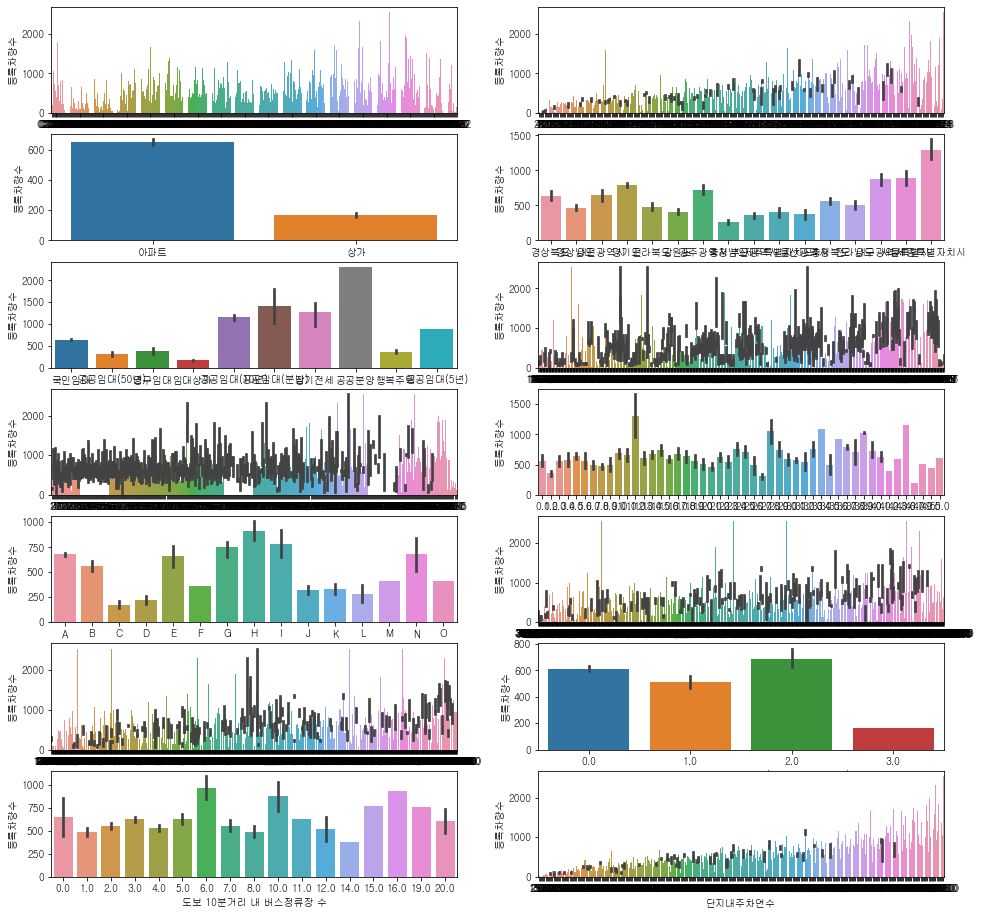

In [210]:
fig, axs = plt.subplots(figsize=(16,16), ncols=2, nrows=7)
features = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수']
for i, f in enumerate(features):
    row = int(i/2)
    col = i%2
    sns.barplot(x=f, y='등록차량수', data=train_df, ax=axs[row][col])

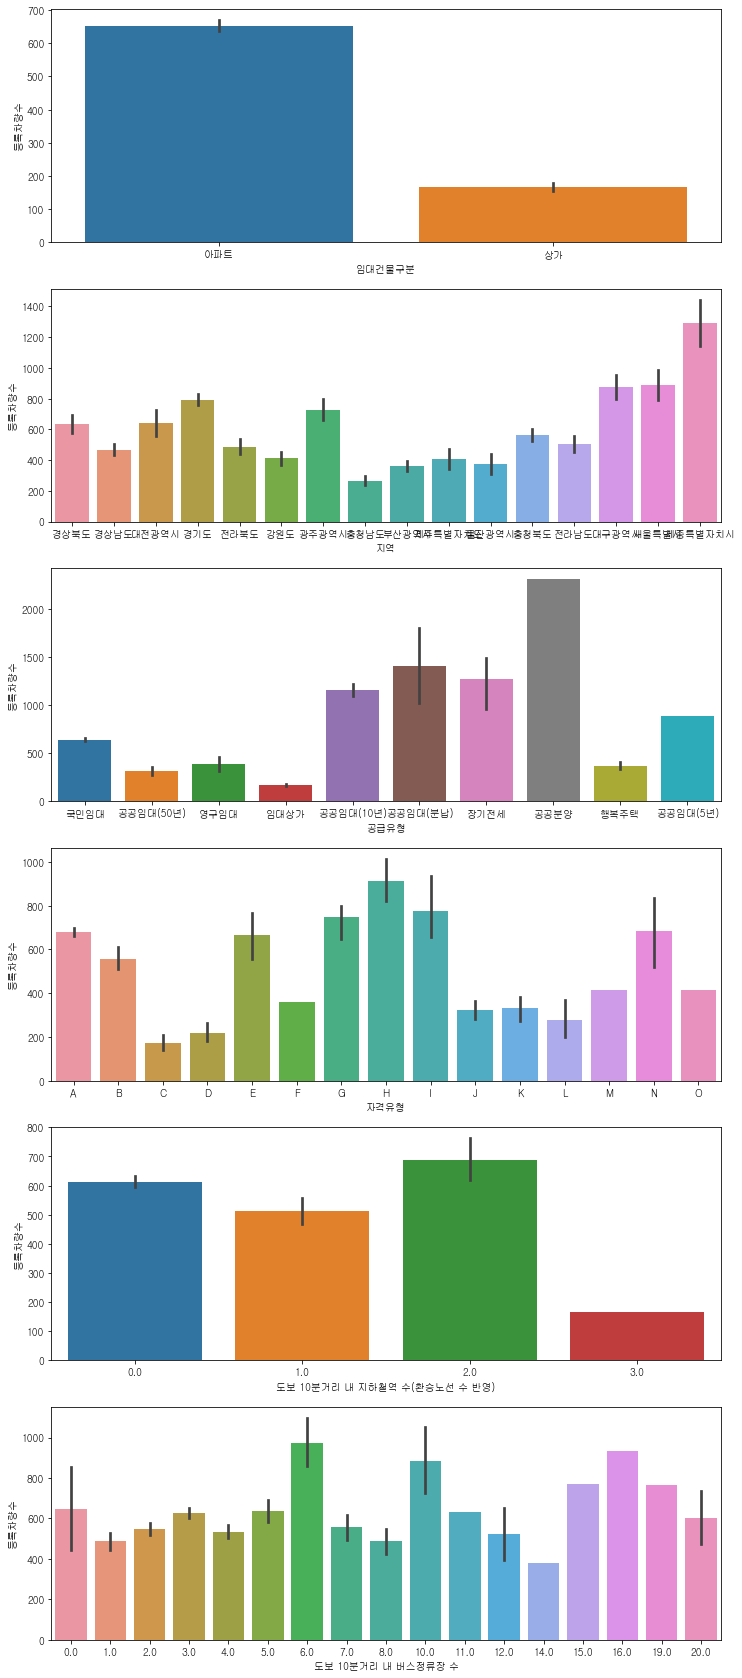

In [211]:
# 숫자형 자료나 단지코드등 피처내의 고유값이 너무 많은 것은 제외하고 다시 그려보자.

fig, axs = plt.subplots(figsize=(12,30), ncols=1, nrows=6)
features = [ '임대건물구분', '지역', '공급유형', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수']
for i, f in enumerate(features):
    row = i%6
    sns.barplot(x=f, y='등록차량수', data=train_df, ax=axs[row])

- 임대건물구분은 아파트의 수 자체가 훨씬 많기 때문에, 등록차량대수도 훨씬 많게 나타남.
- 지역별 등록 차량수는 세종시가 가장 높다.
    - 신도시이고, 차량없이 출퇴근이 힘들어서 그런가?
- 공급유형은 공공분양의 경우가 가장 높게 나타난다.
- 자격유형 : H, I, G, E, N 등록 차량수 높은 편. C,D 의경우 등록 차량 많이 낮음
    - 소득과 관련된 임대아파트는 유형은 아닌지 생각해볼 필요 있음. 자격유형 확인 필요.
- 도보 10분내 지하철역이 3개의 노선이 있을 경우, 현저히 등록차량대수가 낮게 나타남!
    - 지하철이 근처에 많을 수록, 자차 비중이 낮은 것으로 예측.
- 버스정류장의 개수는 지하철만큼 두드러지게 특징을 나타내지는 않음.

(2) 타겟값의 분포
- 정규분포 형태가 가장 좋음!
- 왜곡된 경우에는 회귀 예측 성능이 저하됨
-hist 이용하여 확인 필요

<AxesSubplot:>

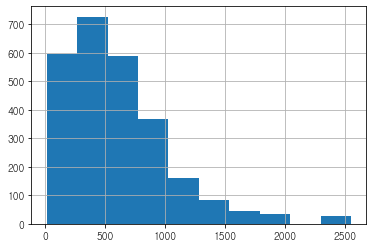

In [212]:
train_df['등록차량수'].hist()

- 등록차량수 값이 정규분포가 아님
- 왜곡된 값을 정규분포로 바꾸기 위해 로그 변환 필요
- log1p() 사용 : 변경된 타겟 값을 기반으로 학습하고, 예측한 값은 다시 expm1 함수 적용하여 원상복구 가능

<AxesSubplot:>

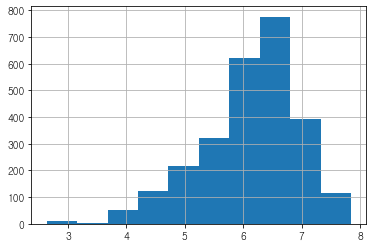

In [213]:
train_df['등록차량수'] = np.log1p(train_df['등록차량수'])
train_df['등록차량수'].hist()
# 로그변환후 왜곡이 조금 줄어 들었음.
# 근데 이게 맞나 ? 오른쪽으로도 쏠린것 같은 것은 기분탓인가.
# 확인 필요함.

In [ ]:
train_df[train_df['임대건물구분']=='상가']

In [ ]:
train_df.describe().T

In [ ]:
test_df.describe().T

In [ ]:
train_df.info()

In [ ]:
obj_cols = []
for col in train_df.columns:
    if train_df[col].dtypes == 'object':
        obj_cols.append(col)

In [ ]:
for col in obj_cols:
    train_unique = set(train_df[col])
    print(col , " unique 개수: ", len(train_unique))
    if len(train_unique) < 100:
        print(col , " : " , train_unique)

In [ ]:
train_apart_df = train_df.loc[train_df['임대건물구분']=='아파트']
train_apart_df.head(1)

In [ ]:
train_apart_df.info()

In [ ]:
train_shop_df = train_df.loc[train_df['임대건물구분']=='상가']
train_shop_df.head(1)

In [ ]:
train_shop_df.info()

**상가는 임대보증금, 임대료가 전부 결측치**

In [ ]:
train_danji_df = train_df.drop_duplicates(subset='단지코드')
train_danji_df.head(1)

In [ ]:
train_danji_df.info()

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(train_df.isnull().T, cbar=False)

In [ ]:
train_df.isnull().sum()

- 임대보증금, 임대료, 지하철역, 버스정류장에 결측치 존재

In [ ]:
print('전체 단지 수: ', train_df['단지코드'].nunique())
print('지하철 결측치 단지 수: ', train_df.loc[train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', train_df.loc[train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', train_df.loc[train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

### 임대건물 구분이 상가일 경우, 임대료가 모두 NaN 이였음.
- 아파트의 경우에도 NaN인 경우가 있는지 확인.

In [ ]:

train_df.loc[(train_df['임대건물구분'] != '상가') & train_df['임대보증금'].isnull()]
